In [1]:
import pandas as pd

In [4]:
%cd ..

/home/esak/Documents/Thesis/Final Repo/mctrs/travel-crs


In [5]:
from src.llm_setup.models import Gemini2Flash, Gemini1Point5Pro

/home/esak/Documents/Thesis/Final Repo/travel-crs/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
for role in ["popularity", "constraint"]:
    print(role, [val[role]["reliability_score"] for val in d.values()])

popularity [1, 1, 0.6666666666666667, 0.64, 0.2577777777777778, 0.40222222222222226]
constraint [1, 1, 0.5866666666666667, 0.6911111111111111, 0.6333333333333333, 0.7711111111111111]


In [18]:
for role in ["popularity", "constraint"]:
    print(role, [val[role]["hallucination_rate"] for val in d.values()])

popularity [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
constraint [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [17]:
for role in ["popularity", "constraint"]:
    print(role, [val[role]["relevance_score"] for val in d.values()])

popularity [0.0, 0.0, 0.0, 0.0, 0.016666666666666666, 0.0]
constraint [0.0, 0.0, 0.0, 0.0, 0.016666666666666666, 0.016666666666666666]


In [31]:
import json
import pandas as pd
import ast
with open('./data/conv-trs/llm-results/Llama3Point2Vision90B_generated_parsed_queries.json') as f:
    d = json.load(f)

In [32]:
df = pd.DataFrame(d)

In [22]:
import pandas as pd
import numpy as np

In [7]:
samples_df = pd.read_csv(f"./data/conv-trs/multi-agent/sample-data/llama3point2_sample.csv")

In [113]:
samples_llama = [
    "c_p_5_pop_high_hard",
    "c_p_68_pop_high_sustainable",
    "c_p_24_pop_low_medium",
    "c_p_136_pop_medium_hard",
    'c_p_143_pop_high_hard',
    'c_p_155_pop_high_hard',
    'c_p_162_pop_high_medium',
    'c_p_131_pop_high_medium',
    'c_p_67_pop_high_sustainable',
    'c_p_43_pop_high_sustainable',
    'c_p_118_pop_low_medium',
    'c_p_60_pop_low_medium',
    'c_p_147_pop_low_sustainable',
    'c_p_169_pop_low_sustainable',
    'c_p_92_pop_medium_hard',
    'c_p_36_pop_medium_hard',
    'c_p_160_pop_medium_medium',
    'c_p_133_pop_medium_medium',
    'c_p_120_pop_medium_sustainable',
    'c_p_14_pop_medium_sustainable',
    'c_p_126_pop_low_sustainable',
    'c_p_94_pop_low_sustainable',
    'c_p_177_pop_low_sustainable'
]

samples_deepseek = [
        "c_p_130_pop_high_medium",
        "c_p_113_pop_low_sustainable",
        "c_p_28_pop_medium_sustainable",
        "c_p_78_pop_medium_medium",
        'c_p_15_pop_high_hard',
        'c_p_116_pop_high_hard',
        'c_p_113_pop_high_medium',
        'c_p_94_pop_high_medium',
        'c_p_0_pop_high_sustainable',
        'c_p_38_pop_high_sustainable',
        'c_p_119_pop_low_medium',
        'c_p_77_pop_low_medium',
        'c_p_3_pop_low_sustainable',
        'c_p_54_pop_low_sustainable',
        'c_p_196_pop_medium_hard',
        'c_p_167_pop_medium_hard',
        'c_p_98_pop_medium_medium',
        'c_p_80_pop_medium_medium',
        'c_p_47_pop_medium_sustainable',
 'c_p_150_pop_medium_sustainable',
 'c_p_31_pop_low_sustainable',
 'c_p_12_pop_low_sustainable'
    ]

In [56]:
all_samples

SyntaxError: invalid syntax (1729801055.py, line 1)

In [8]:
all_samples = samples_df.config_id.to_list()
todo_llama_samples = all_samples[::2]
todo_deepseek_samples = all_samples[1::2] 

In [16]:
import json
hal = {"popularity":[],
       "constraint":[],
       "sustainability":[]}
rely = {"popularity":[],
       "constraint":[],
       "sustainability":[]}
rev = {"popularity":[],
       "constraint":[],
       "sustainability":[]}
for sample in all_samples:
    print(sample)
    with open(f'./data/conv-trs/multi-agent/results/prototype/deepseekreasoner/states/states_{sample}.txt') as f:
       #  if "sustainable" in sample:
       d = json.load(f)
       for role in ["popularity", "constraint", "sustainability"]:
              hal[role].append([val[role]["hallucination_rate"] for val in d.values()])
              rely[role].append([val[role]["reliability_score"] for val in d.values()])
              rev[role].append([val[role]["relevance_score"] for val in d.values()])

c_p_143_pop_high_hard
c_p_15_pop_high_hard
c_p_5_pop_high_hard
c_p_155_pop_high_hard
c_p_116_pop_high_hard
c_p_162_pop_high_medium
c_p_113_pop_high_medium
c_p_130_pop_high_medium
c_p_131_pop_high_medium
c_p_94_pop_high_medium
c_p_67_pop_high_sustainable
c_p_0_pop_high_sustainable
c_p_43_pop_high_sustainable
c_p_68_pop_high_sustainable
c_p_38_pop_high_sustainable
c_p_118_pop_low_medium
c_p_24_pop_low_medium
c_p_119_pop_low_medium
c_p_60_pop_low_medium
c_p_77_pop_low_medium
c_p_113_pop_low_sustainable
c_p_147_pop_low_sustainable
c_p_3_pop_low_sustainable
c_p_169_pop_low_sustainable
c_p_54_pop_low_sustainable
c_p_136_pop_medium_hard
c_p_92_pop_medium_hard
c_p_196_pop_medium_hard
c_p_36_pop_medium_hard
c_p_167_pop_medium_hard
c_p_160_pop_medium_medium
c_p_98_pop_medium_medium
c_p_133_pop_medium_medium
c_p_80_pop_medium_medium
c_p_78_pop_medium_medium
c_p_120_pop_medium_sustainable
c_p_47_pop_medium_sustainable
c_p_14_pop_medium_sustainable
c_p_28_pop_medium_sustainable
c_p_150_pop_medium_s

## Analysis

In [13]:
import matplotlib.pyplot as plt
import numpy as np

### Scores

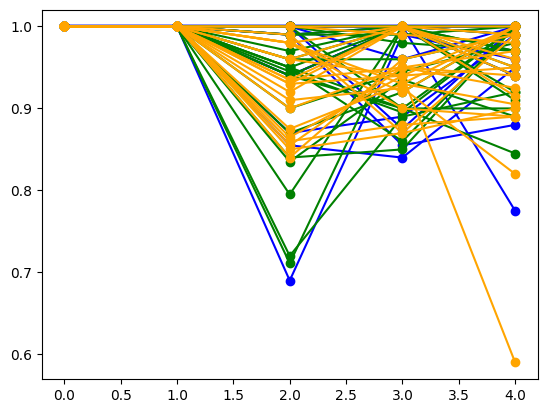

In [135]:
# Plot of Scores
fig, ax = plt.subplots()

for i, y_vals in enumerate(rely_d["popularity"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='blue', marker='o')  # Same color for all lines
    plt.draw()

for i, y_vals in enumerate(rely_d["constraint"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='green', marker='o')  # Same color for all lines
    plt.draw()

for i, y_vals in enumerate(rely_d["interest"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='orange', marker='o')  # Same color for all lines
    plt.draw()

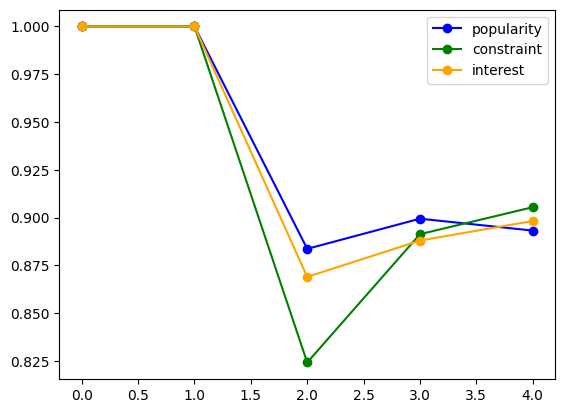

In [19]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rely["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(rely["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(rely["sustainability"], axis=0), color='orange', marker='o', label='interest')
plt.draw()
plt.legend()

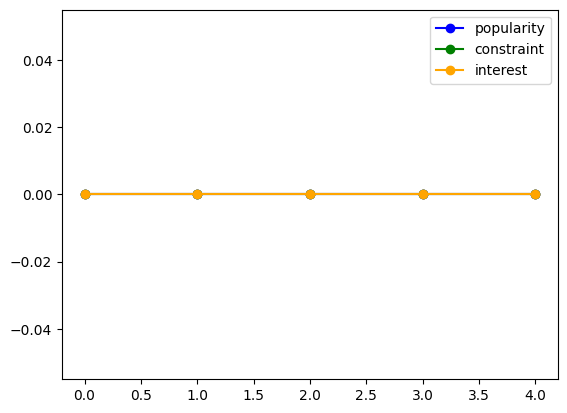

In [18]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(hal["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(hal["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(hal["sustainability"], axis=0), color='orange', marker='o', label='interest')
plt.draw()
plt.legend()

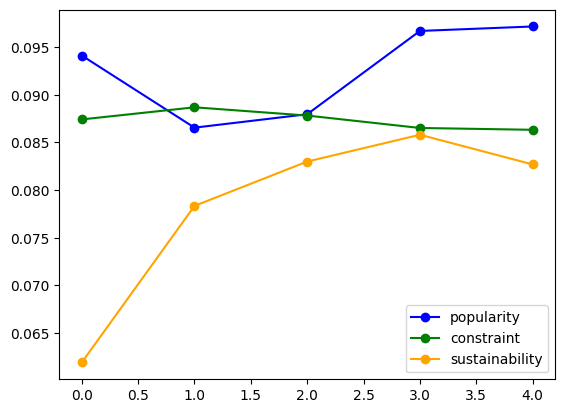

In [17]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rev["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(rev["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(rev["sustainability"], axis=0), color='orange', marker='o', label='sustainability')
plt.draw()
plt.legend()

In [12]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rev["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(rev["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(rev["sustainability"], axis=0), color='orange', marker='o', label='sustainability')
plt.draw()
plt.legend()

NameError: name 'plt' is not defined

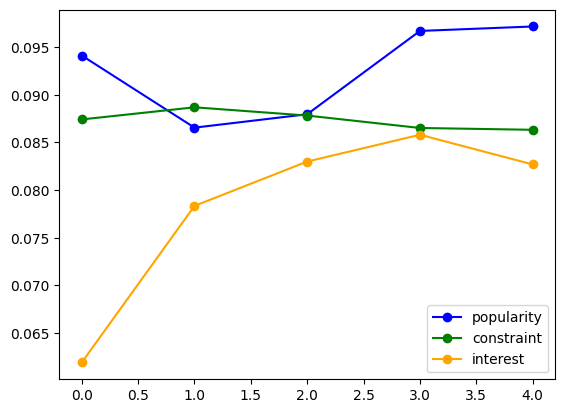

In [24]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rev["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(rev["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(rev["sustainability"], axis=0), color='orange', marker='o', label='interest')
plt.draw()
plt.legend()

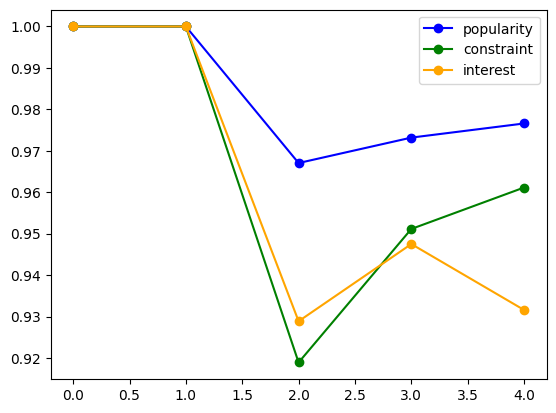

In [144]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rely_d["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(rely_d["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(rely_d["interest"], axis=0), color='orange', marker='o', label='interest')
plt.draw()
plt.legend()

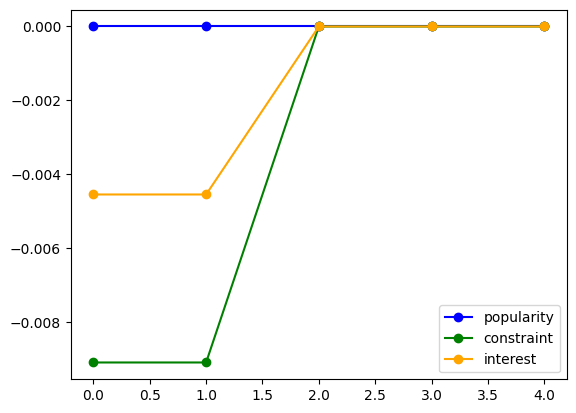

In [148]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(hal_d["popularity"], axis=0), color='blue', marker='o', label='popularity')

ax.plot(x_vals, np.mean(hal_d["constraint"], axis=0), color='green', marker='o',  label='constraint')

ax.plot(x_vals, np.mean(hal_d["interest"], axis=0), color='orange', marker='o', label='interest')

plt.draw()
plt.legend()

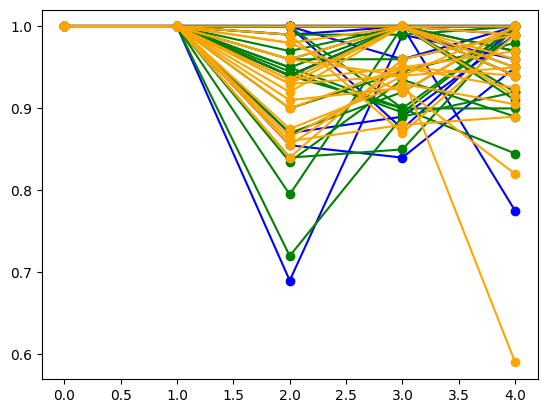

In [106]:
# Plot of Scores
fig, ax = plt.subplots()

for i, y_vals in enumerate(rely["popularity"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='blue', marker='o')  # Same color for all lines
    plt.draw()

for i, y_vals in enumerate(rely["constraint"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='green', marker='o')  # Same color for all lines
    plt.draw()

for i, y_vals in enumerate(rely["interest"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='orange', marker='o')  # Same color for all lines
    plt.draw()

In [121]:
np.mean(rev["popularity"], axis=0)

array([0.12680991, 0.13332669, 0.13837719, 0.13837719, 0.13837719])

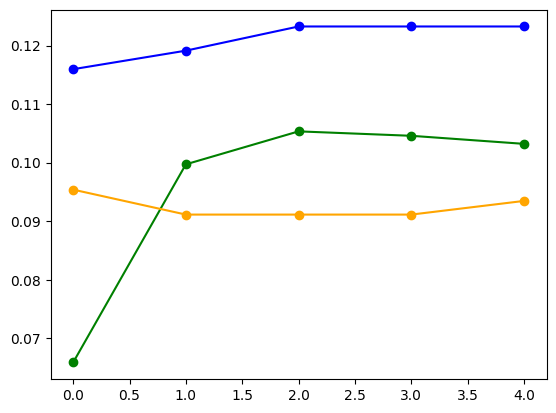

In [138]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rev_d["popularity"], axis=0), color='blue', marker='o')

ax.plot(x_vals, np.mean(rev_d["constraint"], axis=0), color='green', marker='o')

ax.plot(x_vals, np.mean(rev_d["interest"], axis=0), color='orange', marker='o')
plt.draw()

In [21]:
a = ['Paris', 'London', 'Rome', 'Barcelona', 'Amsterdam', 'Berlin', 'Madrid', 'Prague', 'Vienna', 'Istanbul']
b = ['Paris', 'Rome', 'Barcelona', 'Madrid', 'Vienna', 'London', 'Amsterdam', 'Berlin', 'Milan', 'Budapest']
c = ['Paris', 'Copenhagen', 'Amsterdam', 'Barcelona', 'Berlin', 'Vienna', 'Rome', 'Munich', 'Madrid', 'London']

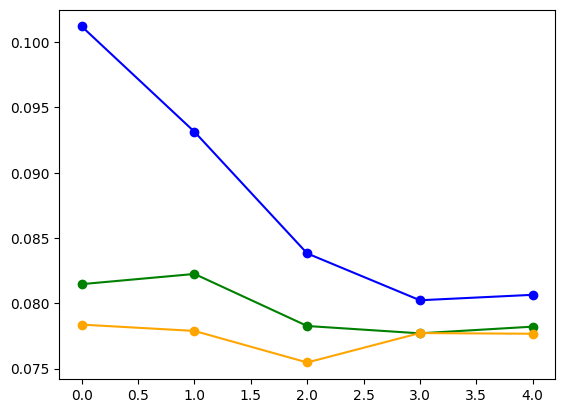

In [139]:
# Plot of Scores
fig, ax = plt.subplots()

x_vals = [0, 1, 2, 3, 4]
ax.plot(x_vals, np.mean(rev_l["popularity"], axis=0), color='blue', marker='o')

ax.plot(x_vals, np.mean(rev_l["constraint"], axis=0), color='green', marker='o')

ax.plot(x_vals, np.mean(rev_l["interest"], axis=0), color='orange', marker='o')
plt.draw()

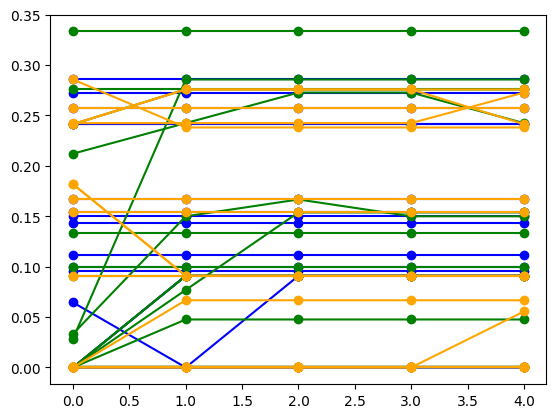

In [107]:
# Plot of Scores
fig, ax = plt.subplots()

for i, y_vals in enumerate(rev["popularity"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='blue', marker='o')
    plt.draw()

for i, y_vals in enumerate(rev["constraint"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='green', marker='o')
    plt.draw()

for i, y_vals in enumerate(rev["interest"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='orange', marker='o')
    plt.draw()

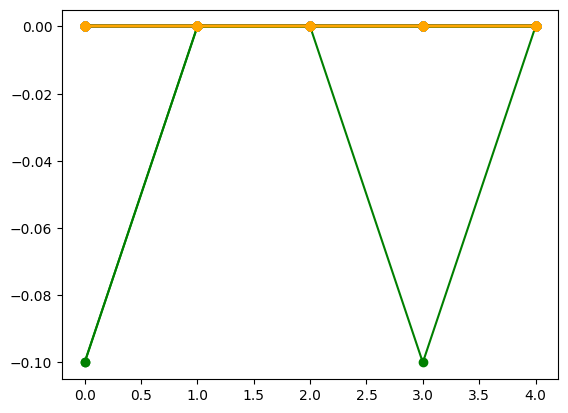

In [91]:
# Plot of Scores
fig, ax = plt.subplots()

for i, y_vals in enumerate(hal["popularity"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='blue', marker='o')
    plt.draw()

for i, y_vals in enumerate(hal["constraint"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='green', marker='o')
    plt.draw()

for i, y_vals in enumerate(hal["interest"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='orange', marker='o')
    plt.draw()

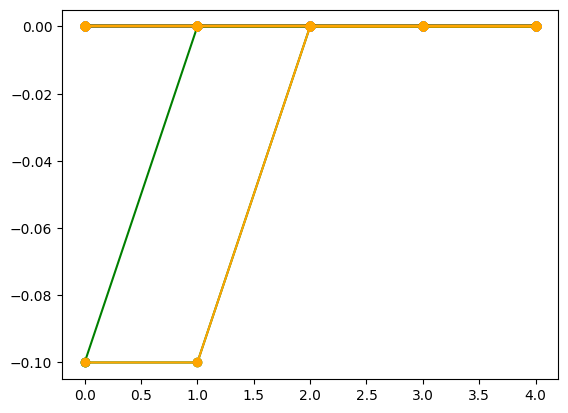

In [108]:
# Plot of Scores
fig, ax = plt.subplots()

for i, y_vals in enumerate(hal["popularity"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='blue', marker='o')
    plt.draw()

for i, y_vals in enumerate(hal["constraint"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='green', marker='o')
    plt.draw()

for i, y_vals in enumerate(hal["interest"]):
    x_vals = list(range(len(y_vals)))
    ax.plot(x_vals, y_vals, color='orange', marker='o')
    plt.draw()

### Model Average

In [92]:
# popularity scores (Llama)
print("relevance", np.mean([np.mean(pop) for pop in rev["popularity"]]))
print("reliability", np.mean([np.mean(pop) for pop in rely["popularity"]]))
print("hallucination", np.mean([np.mean(pop) for pop in hal["popularity"]]))


relevance 0.08780833784768546
reliability 0.8882173913043477
hallucination 0.0


In [109]:
# popularity scores (Deepseek)
print("relevance", np.mean([np.mean(pop) for pop in rev["popularity"]]))
print("reliability", np.mean([np.mean(pop) for pop in rely["popularity"]]))
print("hallucination", np.mean([np.mean(pop) for pop in hal["popularity"]]))


relevance 0.1350536350999829
reliability 0.982722222222222
hallucination 0.0


In [93]:
# constraint scores (Gemini)
print("relevance", np.mean([np.mean(pop) for pop in rev["constraint"]]))
print("reliability", np.mean([np.mean(pop)  for pop in rely["constraint"]]))
print("hallucination", np.mean([np.mean(pop) for pop in hal["constraint"]]))

relevance 0.07957940433908331
reliability 0.9622415458937198
hallucination -0.002608695652173913


In [94]:
# interest scores (Claude)
print("relevance", np.mean([np.mean(pop) for pop in rev["interest"]]))
print("reliability", np.mean([np.mean(pop)  for pop in rely["interest"]]))
print("hallucination", np.mean([np.mean(pop) for pop in hal["interest"]]))

relevance 0.07742291637476399
reliability 0.9506521739130436
hallucination 0.0


### Hit Rate

In [111]:
for sample in (samples_llama):
    with open(f'test_{sample}') as f:
        d = json.load(f)
    hit_rate = []
    rejection = []
    gt = samples_df[samples_df.config_id == sample]["city"].values[0]
    for r in ["0", "1", "2", "3", "4"]:
        coll = d[r]["collective"]["offers"]
        hit_rate.append(len([c for c in coll if c in gt])/len(coll))

        rej = d[r]["collective"]["rejections"]
        rejection.append(len(rej) if rej else 0)
    
    print(sample, hit_rate, rejection)

# good example
# c_p_155_pop_high_hard
# bad example
# c_p_24_pop_low_medium
    

c_p_5_pop_high_hard [0.6, 0.5, 0.6, 0.7, 0.7] [0, 0, 0, 0, 0]
c_p_68_pop_high_sustainable [0.6, 0.6, 0.7, 0.8, 0.7] [0, 0, 1, 1, 1]
c_p_24_pop_low_medium [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_136_pop_medium_hard [0.1, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_143_pop_high_hard [0.9, 0.9, 0.8, 0.9, 0.9] [0, 1, 2, 2, 2]
c_p_155_pop_high_hard [0.7, 0.7, 0.7, 0.8, 0.9] [0, 0, 0, 0, 0]
c_p_162_pop_high_medium [0.6, 0.7, 0.7, 0.7, 0.7] [0, 0, 0, 0, 0]
c_p_131_pop_high_medium [0.7, 0.7, 0.8, 0.8, 0.8] [0, 0, 1, 1, 1]
c_p_67_pop_high_sustainable [0.6, 0.6, 0.6, 0.6, 0.6] [0, 0, 0, 0, 0]
c_p_43_pop_high_sustainable [0.4, 0.4, 0.3, 0.3, 0.4] [0, 0, 0, 0, 0]
c_p_118_pop_low_medium [0.1, 0.1, 0.1, 0.1, 0.1] [0, 0, 0, 0, 0]
c_p_60_pop_low_medium [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 3, 3, 3]
c_p_147_pop_low_sustainable [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_169_pop_low_sustainable [0.0, 0.0, 0.0, 0.0, 0.0] [0, 3, 6, 6, 6]
c_p_92_pop_medium_hard [0.2, 0.1, 0.1, 0.1, 0.1] [0, 2, 2, 2, 2]
c_p_

In [110]:
for sample in (samples_deepseek):
    with open(f'test_{sample}') as f:
        d = json.load(f)
    hit_rate = []
    rejection = []
    gt = samples_df[samples_df.config_id == sample]["city"].values[0]
    for r in ["0", "1", "2", "3", "4"]:
        coll = d[r]["collective"]["offers"]
        hit_rate.append(len([c for c in coll if c in gt])/len(coll))

        rej = d[r]["collective"]["rejections"]
        rejection.append(len(rej) if rej else 0)
    
    print(sample, hit_rate, rejection)

# good example
# c_p_3_pop_low_sustainable
# bad example
# c_p_77_pop_low_medium : the other agents keep pushing away popularity's candidates
    

c_p_130_pop_high_medium [0.9, 0.9, 0.9, 0.9, 0.9] [0, 0, 0, 0, 0]
c_p_113_pop_low_sustainable [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_28_pop_medium_sustainable [0.2, 0.2, 0.2, 0.2, 0.2] [0, 0, 0, 0, 0]
c_p_78_pop_medium_medium [0.1, 0.1, 0.1, 0.1, 0.1] [0, 0, 0, 0, 0]
c_p_15_pop_high_hard [0.6, 0.6, 0.5, 0.5, 0.5] [0, 0, 0, 0, 0]
c_p_116_pop_high_hard [0.7, 0.7, 0.7, 0.7, 0.7] [0, 0, 0, 0, 0]
c_p_113_pop_high_medium [0.7, 0.7, 0.7, 0.7, 0.7] [0, 0, 0, 0, 0]
c_p_94_pop_high_medium [0.1, 0.1, 0.1, 0.1, 0.1] [0, 1, 1, 1, 1]
c_p_0_pop_high_sustainable [0.8, 0.9, 0.9, 0.9, 0.9] [0, 2, 2, 2, 2]
c_p_38_pop_high_sustainable [0.1, 0.1, 0.1, 0.1, 0.1] [0, 3, 3, 3, 3]
c_p_119_pop_low_medium [0.1, 0.1, 0.1, 0.1, 0.1] [0, 0, 0, 0, 0]
c_p_77_pop_low_medium [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_3_pop_low_sustainable [0.1, 0.1, 0.1, 0.1, 0.1] [0, 3, 3, 3, 3]
c_p_54_pop_low_sustainable [0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0]
c_p_196_pop_medium_hard [0.1, 0.1, 0.1, 0.1, 0.1] [0, 0, 1, 2,

### Popularity Proportion

In [50]:
merged = pd.read_csv("./data/conv-trs/kg-generation/new-kg/data/merged.csv")

In [124]:
for sample in (samples_llama):
    if "pop_low" in sample:
        with open(f'test_{sample}') as f:
            d = json.load(f)
        low = []
        for r in ["0", "1", "2", "3", "4"]:
            coll = d[r]["collective"]["offers"]
            low.append(len([c for c in coll if c in merged[merged.popularity=="Low"]["city"].to_list()])/len(coll))
        
        print(sample, low)

c_p_24_pop_low_medium [0.4, 0.4, 0.3, 0.3, 0.1]
c_p_118_pop_low_medium [0.2, 0.2, 0.3, 0.2, 0.1]
c_p_60_pop_low_medium [0.3, 0.3, 0.0, 0.0, 0.0]
c_p_147_pop_low_sustainable [0.1, 0.1, 0.1, 0.1, 0.2]
c_p_169_pop_low_sustainable [0.3, 0.5, 0.3, 0.3, 0.3]
c_p_126_pop_low_sustainable [0.3, 0.4, 0.4, 0.4, 0.3]
c_p_94_pop_low_sustainable [0.4, 0.4, 0.4, 0.3, 0.2]
c_p_177_pop_low_sustainable [0.3, 0.3, 0.3, 0.3, 0.3]


In [125]:
for sample in (samples_deepseek):
    if "pop_low" in sample:
        with open(f'test_{sample}') as f:
            d = json.load(f)
        low = []
        for r in ["0", "1", "2", "3", "4"]:
            coll = d[r]["collective"]["offers"]
            low.append(len([c for c in coll if c in merged[merged.popularity=="Low"]["city"].to_list()])/len(coll))
        
        print(sample, low)

c_p_113_pop_low_sustainable [0.5, 0.5, 0.5, 0.5, 0.5]
c_p_119_pop_low_medium [0.4, 0.4, 0.4, 0.4, 0.4]
c_p_77_pop_low_medium [0.5, 0.5, 0.4, 0.4, 0.4]
c_p_3_pop_low_sustainable [0.4, 0.5, 0.5, 0.5, 0.4]
c_p_54_pop_low_sustainable [0.4, 0.4, 0.4, 0.4, 0.4]
c_p_31_pop_low_sustainable [0.4, 0.4, 0.4, 0.4, 0.4]
c_p_12_pop_low_sustainable [0.4, 0.4, 0.4, 0.4, 0.4]


In [88]:
for sample in (samples_llama):
    if "pop_med" in sample:
        with open(f'test_{sample}') as f:
            d = json.load(f)
        med = []
        for r in ["0", "1", "2", "3", "4"]:
            coll = d[r]["collective"]["offers"]
            med.append(len([c for c in coll if c in merged[merged.popularity=="Medium"]["city"].to_list()])/len(coll))
        
        print(sample, med)

c_p_136_pop_medium_hard [0.2, 0.1, 0.0, 0.0, 0.0]
c_p_92_pop_medium_hard [0.2, 0.1, 0.1, 0.1, 0.1]
c_p_36_pop_medium_hard [0.0, 0.0, 0.0, 0.0, 0.0]
c_p_160_pop_medium_medium [0.1, 0.0, 0.0, 0.0, 0.0]
c_p_133_pop_medium_medium [0.1, 0.1, 0.1, 0.0, 0.0]
c_p_120_pop_medium_sustainable [0.2, 0.2, 0.2, 0.2, 0.2]
c_p_14_pop_medium_sustainable [0.0, 0.0, 0.0, 0.0, 0.0]


In [95]:
for sample in (samples_llama):
    if "pop_high" in sample:
        with open(f'test_{sample}') as f:
            d = json.load(f)
        high = []
        for r in ["0", "1", "2", "3", "4"]:
            coll = d[r]["collective"]["offers"]
            high.append(len([c for c in coll if c in merged[merged.popularity=="High"]["city"].to_list()])/len(coll))
        
        print(sample, low)

c_p_5_pop_high_hard [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_68_pop_high_sustainable [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_143_pop_high_hard [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_155_pop_high_hard [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_162_pop_high_medium [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_131_pop_high_medium [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_67_pop_high_sustainable [0.3, 0.3, 0.3, 0.3, 0.3]
c_p_43_pop_high_sustainable [0.3, 0.3, 0.3, 0.3, 0.3]


In [87]:
samples_llama

['c_p_5_pop_high_hard',
 'c_p_68_pop_high_sustainable',
 'c_p_24_pop_low_medium',
 'c_p_136_pop_medium_hard',
 'c_p_143_pop_high_hard',
 'c_p_155_pop_high_hard',
 'c_p_162_pop_high_medium',
 'c_p_131_pop_high_medium',
 'c_p_67_pop_high_sustainable',
 'c_p_43_pop_high_sustainable',
 'c_p_118_pop_low_medium',
 'c_p_60_pop_low_medium',
 'c_p_147_pop_low_sustainable',
 'c_p_169_pop_low_sustainable',
 'c_p_92_pop_medium_hard',
 'c_p_36_pop_medium_hard',
 'c_p_160_pop_medium_medium',
 'c_p_133_pop_medium_medium',
 'c_p_120_pop_medium_sustainable',
 'c_p_14_pop_medium_sustainable',
 'c_p_126_pop_low_sustainable',
 'c_p_94_pop_low_sustainable',
 'c_p_177_pop_low_sustainable']

### Rejection

In [100]:
for sample in (samples_llama):
    with open(f'test_{sample}') as f:
        d = json.load(f)
    rejection = []
    for r in ["0", "1", "2", "3", "4"]:
        rej = d[r]["collective"]["rejections"]
        rejection.append(len(rej) if rej else 0)
    
    print(sample, rejection)

c_p_5_pop_high_hard [0, 0, 0, 0, 0]
c_p_68_pop_high_sustainable [0, 0, 1, 1, 1]
c_p_24_pop_low_medium [0, 0, 0, 0, 0]
c_p_136_pop_medium_hard [0, 0, 0, 0, 0]
c_p_143_pop_high_hard [0, 1, 2, 2, 2]
c_p_155_pop_high_hard [0, 0, 0, 0, 0]
c_p_162_pop_high_medium [0, 0, 0, 0, 0]
c_p_131_pop_high_medium [0, 0, 1, 1, 1]
c_p_67_pop_high_sustainable [0, 0, 0, 0, 0]
c_p_43_pop_high_sustainable [0, 0, 0, 0, 0]
c_p_118_pop_low_medium [0, 0, 0, 0, 0]
c_p_60_pop_low_medium [0, 0, 3, 3, 3]
c_p_147_pop_low_sustainable [0, 0, 0, 0, 0]
c_p_169_pop_low_sustainable [0, 3, 6, 6, 6]
c_p_92_pop_medium_hard [0, 2, 2, 2, 2]
c_p_36_pop_medium_hard [0, 0, 0, 0, 0]
c_p_160_pop_medium_medium [0, 0, 0, 0, 0]
c_p_133_pop_medium_medium [0, 0, 0, 0, 0]
c_p_120_pop_medium_sustainable [0, 0, 0, 0, 0]
c_p_14_pop_medium_sustainable [0, 0, 0, 0, 0]
c_p_126_pop_low_sustainable [0, 0, 0, 0, 0]
c_p_94_pop_low_sustainable [0, 0, 0, 0, 0]
c_p_177_pop_low_sustainable [0, 0, 0, 0, 0]


### Common Cities

In [157]:
common = 0
for sample in (samples_llama + samples_deepseek):
    with open(f'test_{sample}') as f:
        if "pop_high" in sample:
            d = json.load(f)
            constr = d["4"]["constraint"]["offers"]
            intr = d["4"]["interest"]["offers"]
            pop = d["4"]["popularity"]["offers"]

            common += len(set(constr) & set(intr) & set(pop))
    
            print(sample, len(set(constr) & set(intr) & set(pop)))

c_p_5_pop_high_hard 6
c_p_68_pop_high_sustainable 6
c_p_143_pop_high_hard 9
c_p_155_pop_high_hard 6
c_p_162_pop_high_medium 5
c_p_131_pop_high_medium 6
c_p_67_pop_high_sustainable 8
c_p_43_pop_high_sustainable 2
c_p_130_pop_high_medium 7
c_p_15_pop_high_hard 7
c_p_116_pop_high_hard 6
c_p_113_pop_high_medium 1
c_p_94_pop_high_medium 0
c_p_0_pop_high_sustainable 9
c_p_38_pop_high_sustainable 8


In [150]:
common / 45

3.7777777777777777

In [154]:
# low
common / 15

0.6666666666666666

In [156]:
# med
common / 15

4.933333333333334

In [158]:
# high
common / 15

5.733333333333333

In [2]:
a = {"a":1, "a":2}

In [26]:
list(a.keys())[0]

'a'

In [11]:
import pandas as pd
import json

In [20]:
df = pd.read_csv("./data/conv-trs/multi-agent/results/sasi_results.csv")

In [21]:
c = df.to_json()

In [23]:
print(c)

{"config_id":{"0":"c_p_143_pop_high_hard","1":"c_p_15_pop_high_hard"},"config":{"0":"{'p_id': 'p_143', 'persona': 'A former printing press worker who witnessed the transition from print to digital media', 'filters': {'popularity': 'high', 'month': 'February', 'budget': 'high', 'interests': 'Arts & Entertainment'}}","1":"{'p_id': 'p_15', 'persona': 'A patient who seeks therapy and values evidence-based approaches to address their mental health concerns', 'filters': {'popularity': 'high', 'month': 'December', 'interests': 'Shops & Services', 'budget': 'high'}}"},"query":{"0":"\"Recommend European cities for a high-budget trip in March with a focus on arts, culture, and nightlife, avoiding cities with low seasons.\"","1":"\"High budget European cities to visit in December with popular attractions and seasonal activities.\""},"response_Gemini2Flash":{"0":"['Paris', 'Rome', 'Barcelona', 'Amsterdam', 'Berlin', 'Vienna', 'Madrid', 'London', 'Prague', 'Florence']","1":"['Paris', 'London', 'Vie

In [19]:
row_indices = next(iter(data.values())).keys()


{'config_id': {0: 'c_p_143_pop_high_hard', 1: 'c_p_15_pop_high_hard'},
 'config': {0: "{'p_id': 'p_143', 'persona': 'A former printing press worker who witnessed the transition from print to digital media', 'filters': {'popularity': 'high', 'month': 'February', 'budget': 'high', 'interests': 'Arts & Entertainment'}}",
  1: "{'p_id': 'p_15', 'persona': 'A patient who seeks therapy and values evidence-based approaches to address their mental health concerns', 'filters': {'popularity': 'high', 'month': 'December', 'interests': 'Shops & Services', 'budget': 'high'}}"},
 'query': {0: '"Recommend European cities for a high-budget trip in March with a focus on arts, culture, and nightlife, avoiding cities with low seasons."',
  1: '"High budget European cities to visit in December with popular attractions and seasonal activities."'},
 'response_Gemini2Flash': {0: "['Paris', 'Rome', 'Barcelona', 'Amsterdam', 'Berlin', 'Vienna', 'Madrid', 'London', 'Prague', 'Florence']",
  1: "['Paris', 'Londo